# Tutorial 7: Why is there a Jump??

---

### Introduction

Hello, in the last notebook we noticed that there is a jump with a certain feature, now we want to investigate why is that is the case. In the prevoius notebook, we noticed a jump by the 5th feature. 

first, let us call the data

In [1]:
%store -r df_input_RG
%store -r y_RG
%store -r df_RG

In [2]:
y_RG = y_RG.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [5]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_RG, y_RG, test_size = 0.3, random_state=3, stratify=y_RG) # train and valid sets

In [6]:
print(Xtrain.shape)
print(Xtest.shape)

(393, 2074)
(169, 2074)


---

<b><i> get the best N features </i></b> 

In [7]:
%store -r featImp_RG

In [8]:
arrimp = np.array(featImp_RG).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1316 1284 1093 1290   60 1034 1068 1029 1070 1107]


In [10]:
cols_ordered = df_input_RG.columns[sorted_idx][-400:]
cols_ordered

Index([1089.345, 1063.429,  962.734,  965.601,   914.19, 1076.231, 1250.068,
        960.238, 1267.175, 1047.108,
       ...
       1445.173, 1419.847, 1285.394, 1424.528,  850.046, 1248.864, 1269.657,
       1245.863, 1270.902, 1294.379],
      dtype='object', length=400)

---

In [11]:
Xtrain[cols_ordered]

,1089.345,1063.429,962.734,965.601,914.190,1076.231,1250.068,960.238,1267.175,1047.108,...,1445.173,1419.847,1285.394,1424.528,850.046,1248.864,1269.657,1245.863,1270.902,1294.379
379,1.028729,1.030634,1.004159,1.004502,1.044561,1.030239,0.965256,1.005951,0.966981,1.025428,...,0.796700,0.816613,0.965266,0.808167,1.052470,0.965650,0.966705,0.965603,0.966063,0.963941
206,-0.904164,-0.908347,-0.839096,-0.835209,-0.930014,-0.908296,-0.728967,-0.843634,-0.730239,-0.900330,...,-0.452495,-0.447041,-0.722030,-0.446465,-0.930544,-0.728422,-0.730134,-0.727560,-0.729684,-0.712608
432,1.122145,1.130994,1.050363,1.048614,1.148173,1.129931,0.994477,1.052448,0.996704,1.121994,...,0.855384,0.838502,0.989786,0.843569,1.155776,0.994813,0.996318,0.993234,0.996334,0.982111
272,1.280480,1.276190,1.288912,1.291579,1.260572,1.280038,1.325512,1.288275,1.326231,1.275333,...,1.492504,1.506321,1.333299,1.500297,1.245707,1.325703,1.327618,1.325240,1.327287,1.338556
321,1.060025,1.059908,1.056354,1.054482,1.072937,1.060009,1.027649,1.052442,1.026796,1.056701,...,0.808170,0.834994,1.028176,0.824187,1.085934,1.028247,1.027980,1.027653,1.028410,1.026382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,-0.878273,-0.876218,-0.884011,-0.882976,-0.881033,-0.876016,-0.877428,-0.883691,-0.876172,-0.877518,...,-0.636559,-0.647769,-0.874418,-0.641312,-0.892337,-0.877430,-0.875470,-0.877618,-0.875385,-0.872381
352,0.864009,0.870660,0.805071,0.800712,0.901922,0.870764,0.692594,0.808347,0.693379,0.863362,...,0.045670,0.052283,0.684628,0.046264,0.929434,0.692055,0.693880,0.691212,0.693527,0.671506
451,0.741530,0.757715,0.693019,0.690487,0.804252,0.753378,0.535054,0.697061,0.537864,0.755628,...,-0.668446,-0.633230,0.522034,-0.647791,0.844424,0.535109,0.536361,0.532918,0.535635,0.504907
416,1.049970,1.050386,1.017431,1.013633,1.065975,1.052346,0.962966,1.015219,0.965401,1.044772,...,0.672878,0.677292,0.960809,0.673813,1.069079,0.963161,0.964591,0.962735,0.964783,0.955840


### RFE

In [12]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [24]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
selected = []
for i in range (1, 8):
    print(i)
    rfe = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i)
    # fit RFE
    rfe.fit(Xtrain[cols_ordered].values, Ytrain)
    # summarize all features
    selected_feat = []
    for i in range(Xtrain[cols_ordered].shape[1]):
        if rfe.support_[i] == True:
            selected_feat.append(i)
            print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        
    print()
    selected.append(selected_feat)
    
    
    

1
Column: 260, Selected True, Rank: 1.000

2
Column: 38, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000

3
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000

4
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000
Column: 291, Selected True, Rank: 1.000

5
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000
Column: 291, Selected True, Rank: 1.000
Column: 373, Selected True, Rank: 1.000

6
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 198, Selected True, Rank: 1.000
Column: 260, Selected True, Rank: 1.000
Column: 291, Selected True, Rank: 1.000
Column: 373, Selected True, Rank: 1.000

7
Column: 38, Selected True, Rank: 1.000
Column: 182, Selected True, Rank: 1.000
Column: 198, Selected True, Rank: 1.000
Column: 232, Selected True

---

In [25]:
selected

[[260],
 [38, 260],
 [38, 182, 260],
 [38, 182, 260, 291],
 [38, 182, 260, 291, 373],
 [38, 182, 198, 260, 291, 373],
 [38, 182, 198, 232, 260, 291, 373]]

In [26]:
selected2 = selected
selected2.append([232, 198])
selected2.append( [232, 198, 260] )
selected2.append([232, 198, 260, 38])
selected2.append( [232, 198, 260, 38, 182] )
selected2.append( [232, 198, 260, 38, 182, 291] )
selected2.append( [232, 198, 260, 38, 182, 291, 372] )




selected2

[[260],
 [38, 260],
 [38, 182, 260],
 [38, 182, 260, 291],
 [38, 182, 260, 291, 373],
 [38, 182, 198, 260, 291, 373],
 [38, 182, 198, 232, 260, 291, 373],
 [232, 198],
 [232, 198, 260],
 [232, 198, 260, 38],
 [232, 198, 260, 38, 182],
 [232, 198, 260, 38, 182, 291],
 [232, 198, 260, 38, 182, 291, 372]]

In [27]:
len(selected2)

13

### LR

In [28]:
lr = LogisticRegression()

In [29]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [30]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [31]:
from source.ml_acc import get_accuracy_ml

In [32]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in selected2:
        print(cols_ordered[f])

        xtr =  Xtrain[cols_ordered].iloc[:, f]
        xte =  Xtest[cols_ordered].iloc[:, f]
        # print(xtr)
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+","+str((f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

Index([1302.18], dtype='object')
Index([871.769, 1302.18], dtype='object')
Index([871.769, 1302.834, 1302.18], dtype='object')
Index([871.769, 1302.834, 1302.18, 870.89], dtype='object')
Index([871.769, 1302.834, 1302.18, 870.89, 1304.801], dtype='object')
Index([871.769, 1302.834, 865.079, 1302.18, 870.89, 1304.801], dtype='object')
Index([871.769, 1302.834, 865.079, 1322.776, 1302.18, 870.89, 1304.801], dtype='object')
Index([1322.776, 865.079], dtype='object')
Index([1322.776, 865.079, 1302.18], dtype='object')
Index([1322.776, 865.079, 1302.18, 871.769], dtype='object')
Index([1322.776, 865.079, 1302.18, 871.769, 1302.834], dtype='object')
Index([1322.776, 865.079, 1302.18, 871.769, 1302.834, 870.89], dtype='object')
Index([1322.776, 865.079, 1302.18, 871.769, 1302.834, 870.89, 1450.834], dtype='object')


---

In [33]:
# ml_dicts

In [34]:
import json

In [37]:
with open('ml_rg_inv.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [38]:
import json
with open('ml_rg_inv.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('base_rg.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()    

dict_keys(['lr, all'])

In [39]:
print(baseDict['lr'].keys()    )
print(ml_dicts['lr'].keys()    )

dict_keys(['lr, all'])
dict_keys(['lr,[260]', 'lr,[38, 260]', 'lr,[38, 182, 260]', 'lr,[38, 182, 260, 291]', 'lr,[38, 182, 260, 291, 373]', 'lr,[38, 182, 198, 260, 291, 373]', 'lr,[38, 182, 198, 232, 260, 291, 373]', 'lr,[232, 198]', 'lr,[232, 198, 260]', 'lr,[232, 198, 260, 38]', 'lr,[232, 198, 260, 38, 182]', 'lr,[232, 198, 260, 38, 182, 291]', 'lr,[232, 198, 260, 38, 182, 291, 372]'])


In [40]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [41]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]


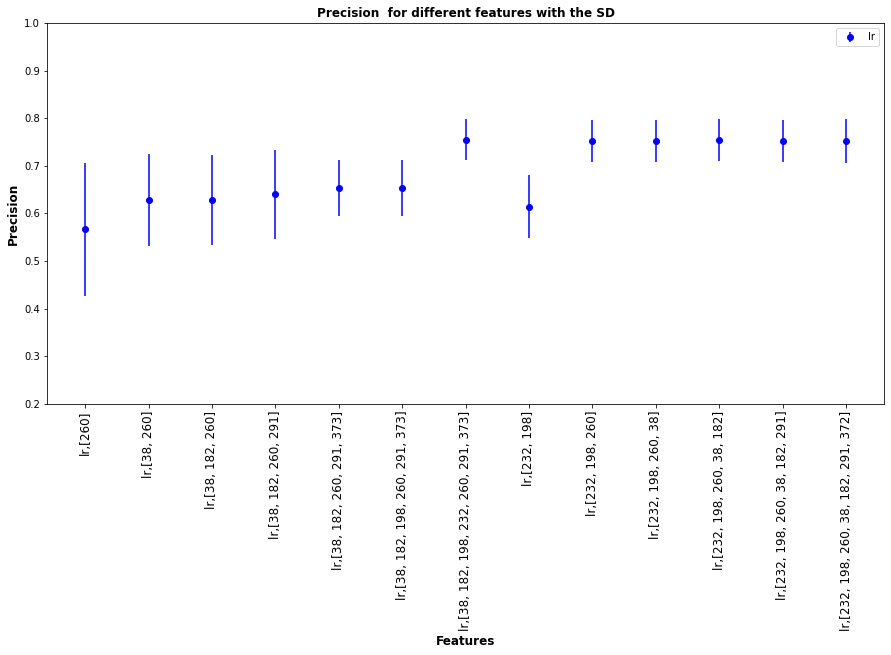

In [43]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,13)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = '90',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

In [44]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    for f_key in ml_dicts[m_key].keys():
        value = f_key.split(',')
        acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )

        sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
        sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_diff_arr.append(sd) # append sd_arr to an array
    arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr]) 

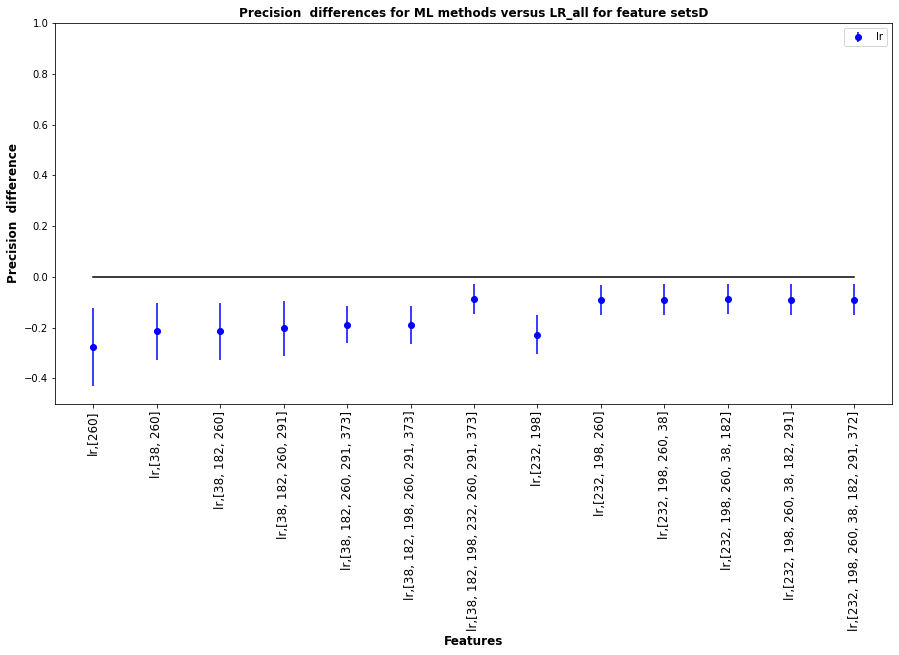

In [47]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR_all for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-0.5
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,13)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(13*1), color = 'Black')        
plt.xticks(space, tickFeat, rotation = '90',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()